Proyecto de Análisis Exploratorio de Datos (EDA) 

Anime Dataset 2023

### **1. Introducción y Selección del Dataset**

Este proyecto se centra en el análisis exhaustivo de la industria del anime, utilizando un conjunto de datos que abarca décadas de producciones hasta el año **2023**. El objetivo principal es descubrir los patrones subyacentes detrás del éxito de las series, la evolución técnica de los géneros y, posteriormente, el impacto de variables externas (como el talento de los actores de voz) en la recepción del público.

#### **🔍 Descripción del Dataset**

El dataset seleccionado cumple con los requisitos de volumen y complejidad necesarios para un análisis profundo, alejándose de conjuntos de datos excesivamente simplificados.

* **Fuente:** Publicado en [Kaggle](https://www.kaggle.com/) .
* **Tamaño del Corpus:** * **Filas:** 24,905 registros.
    * **Variables:** 24 columnas (mezcla de datos numéricos, categóricos y de texto).
* **Unidad de Análisis:** Cada fila representa una obra individual de animación japonesa (Series de TV, Películas, OVAs, ONAs y Especiales).

#### **🎯 Objetivos del Análisis**

1.  **Identificar Patrones de Éxito:** Determinar qué factores (fuente original, estudio, duración) correlacionan mejor con una puntuación alta (`Score`).
2.  **Evolución Temporal:** Analizar cómo han cambiado las preferencias de géneros y la cantidad de producción desde el siglo pasado hasta 2023.
3.  **Análisis de Talento (Enriquecimiento):** Evaluar si la participación de actores de voz (*Seiyuus*) reconocidos influye directamente en la popularidad y fidelización de la audiencia.

In [15]:
import pandas as pd

df_anime = pd.read_csv("anime-dataset-2023.csv")
df_anime.info()

<class 'pandas.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   anime_id      24905 non-null  int64
 1   Name          24905 non-null  str  
 2   English name  24905 non-null  str  
 3   Other name    24905 non-null  str  
 4   Score         24905 non-null  str  
 5   Genres        24905 non-null  str  
 6   Synopsis      24905 non-null  str  
 7   Type          24905 non-null  str  
 8   Unnamed: 8    24905 non-null  str  
 9   Aired         24905 non-null  str  
 10  Episodes      24905 non-null  str  
 11  Status        24905 non-null  str  
 12  Producers     24905 non-null  str  
 13  Licensors     24905 non-null  str  
 14  Studios       24905 non-null  str  
 15  Source        24905 non-null  str  
 16  Duration      24905 non-null  str  
 17  Rating        24905 non-null  str  
 18  Rank          24905 non-null  str  
 19  Popularity    24905 non-null  int64


In [16]:
df_anime.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Unnamed: 8,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


**Transformación de Variables Críticas a Formato Numérico**

Para poder realizar operaciones estadísticas y visualizaciones cuantitativas, es imperativo convertir las columnas **`Score`**, **`Episodes`** y **`Rank`** de tipo objeto (texto) a tipo numérico. Esta transformación es la base para los análisis posteriores:

* **⭐ Score:** Variable crítica necesaria para calcular el promedio de calidad, desviaciones típicas y comparativas de rendimiento entre géneros.
* **📺 Episodes:** Fundamental para analizar la relación entre la longitud de la serie y su éxito o tasa de abandono.
* **🏆 Rank:** Clave para entender el posicionamiento relativo de la obra dentro del mercado global y su prestigio en la comunidad.

In [17]:
# Definimos las columnas que queremos transformar
cols_a_transformar = ['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']

# Aplicamos la transformación
for col in cols_a_transformar:
    # errors='coerce' es vital: si encuentra un valor que no puede convertir (como un NaN persistente), 
    # lo dejará como nulo numérico en lugar de detener el programa con un error.
    df_anime[col] = pd.to_numeric(df_anime[col], errors='coerce')

# Verificamos el resultado
print("✅ Transformación completada con éxito.")
print(df_anime[cols_a_transformar].info())

# Un pequeño vistazo a las estadísticas básicas para confirmar que funciona
print("\n--- Primeras estadísticas descriptivas ---")
print(df_anime[cols_a_transformar].describe())

✅ Transformación completada con éxito.
<class 'pandas.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Score       15692 non-null  float64
 1   Episodes    0 non-null      float64
 2   Rank        20293 non-null  float64
 3   Popularity  24905 non-null  int64  
 4   Favorites   24905 non-null  int64  
 5   Scored By   15692 non-null  float64
 6   Members     24905 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.3 MB
None

--- Primeras estadísticas descriptivas ---
              Score  Episodes          Rank    Popularity      Favorites  \
count  15692.000000       0.0  20293.000000  24905.000000   24905.000000   
mean       6.380890       NaN   9960.770167  12265.388356     432.595222   
std        0.928696       NaN   5856.990951   7187.428393    4353.181647   
min        1.850000       NaN      0.000000      0.000000       0.000000   
25%        5.730

### ⚠️ Observación Inicial: El problema de los valores "UNKNOWN"
A diferencia de otros datasets donde los datos faltantes aparecen como celdas vacías o `NaN`, este conjunto de datos utiliza el string `"UNKNOWN"` como marcador de posición. 
* **Impacto:** Python trata estas columnas como tipo `object` (texto), impidiendo realizar cálculos matemáticos (medias, correlaciones) en variables que deberían ser numéricas como `Score` o `Episodes`.
* **Solución:** Realizaremos una limpieza profunda para transformar estos "falsos textos" en valores nulos reales y convertir las columnas a sus tipos de datos correctos.

In [18]:
import numpy as np
df_anime.replace('UNKNOWN', np.nan, inplace=True)
# Conversión de columnas a tipos numéricos
# Usamos errors='coerce' para que cualquier residuo de texto se convierta en NaN
cols_numericas = ['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']
df_anime[cols_numericas].info()

<class 'pandas.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Score       15692 non-null  float64
 1   Episodes    0 non-null      float64
 2   Rank        20293 non-null  float64
 3   Popularity  24905 non-null  int64  
 4   Favorites   24905 non-null  int64  
 5   Scored By   15692 non-null  float64
 6   Members     24905 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.3 MB


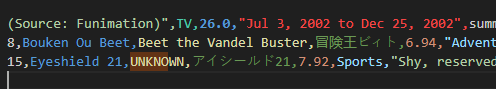

Se observa como la columna aired hay que tratarla para poder trabajar con ella

In [19]:
df_anime['Genres'] = df_anime['Genres'].fillna('Unknown')
df_anime['Studios'] = df_anime['Studios'].fillna('Unknown')
df_anime['Type'] = df_anime['Type'].fillna('Unknown')

#  Limpieza de strings (eliminar espacios en blanco extra)
df_anime['Genres'] = df_anime['Genres'].str.strip()
df_anime['Studios'] = df_anime['Studios'].str.strip()

#Columna de año de inicio
df_anime['Start_Year'] = df_anime['Aired'].str.extract(r'(\d{4})').astype(float)
print(df_anime[['Name', 'Start_Year']].head())

                              Name  Start_Year
0                     Cowboy Bebop      1998.0
1  Cowboy Bebop: Tengoku no Tobira      2001.0
2                           Trigun      1998.0
3               Witch Hunter Robin      2002.0
4                   Bouken Ou Beet      2004.0


In [20]:
df_anime.dropna(subset=['Score'], inplace=True)
df_anime = df_anime.sort_values('Score', ascending=False)

print(f"✅ Filas restantes tras limpiar nulos en Score: {len(df_anime)}")
display(df_anime[['Name', 'Popularity', 'Score']].head(100))

✅ Filas restantes tras limpiar nulos en Score: 15692


,Name,Popularity,Score
3961,Fullmetal Alchemist: Brotherhood,3,9.10
5667,Steins;Gate,13,9.07
16617,Bleach: Sennen Kessen-hen,464,9.07
9880,Gintama°,331,9.06
17572,Kaguya-sama wa Kokurasetai: Ultra Romantic,198,9.05
...,...,...,...
11591,Natsume Yuujinchou Go,1256,8.57
23,Kenpuu Denki Berserk,325,8.56
13343,Kimi no Suizou wo Tabetai,168,8.56
16039,Fruits Basket 2nd Season,440,8.55


In [21]:
# Ordenamos de menor a mayor (1, 2, 3...) para ver los más populares primero
df_popular = df_anime.sort_values('Popularity', ascending=True)

# Mostramos los primeros 100
print("🔥 Top 100: Los animes más populares de la historia")
display(df_popular[['Name', 'Popularity', 'Score']].head(100))

🔥 Top 100: Los animes más populares de la historia


,Name,Popularity,Score
7428,Shingeki no Kyojin,1,8.54
1393,Death Note,2,8.62
3961,Fullmetal Alchemist: Brotherhood,3,9.10
10408,One Punch Man,4,8.50
6596,Sword Art Online,5,7.20
...,...,...,...
16140,Kaguya-sama wa Kokurasetai? Tensai-tachi no Re...,96,8.64
404,Howl no Ugoku Shiro,97,8.66
14945,Enen no Shouboutai,98,7.71
20430,Kimetsu no Yaiba: Yuukaku-hen,99,8.80


In [ ]:
import requests, time
import pandas as pd

# 1. Seleccionar los 500 con mejor ranking de Popularity 
muestra = df_anime.sort_values('Popularity', ascending=True).head(500).copy()
datos_api = []

for i, aid in enumerate(muestra['anime_id']):
    try:
        res = requests.get(f"https://api.jikan.moe/v4/anime/{aid}/characters", timeout=10)
        
        if res.status_code == 200:
            data = res.json().get('data', [])
            # 1. Filtramos solo los personajes marcados como 'Main'
            mains = [c for c in data if c.get('role') == 'Main']
            
            if mains:
                # 2. Heurística para el "Verdadero" Protagonista:
                # Buscamos el que tenga más favoritos. 
                # Nota: Esto requiere una pequeña pausa extra para no saturar la API
                protagonista = None
                max_favs = -1
                
                # Para no hacer 500 llamadas extra, podemos simplemente tomar el 
                # primero de la lista 'mains', pero si quieres precisión total, 
                # tendrías que consultar el detalle de cada 'main':
                for m_char in mains[:3]: # Limitamos a los 3 primeros 'mains' por velocidad
                    char_id = m_char['character']['mal_id']
                    char_info = requests.get(f"https://api.jikan.moe/v4/characters/{char_id}").json()
                    favs = char_info.get('data', {}).get('favorites', 0)
                    
                    if favs > max_favs:
                        max_favs = favs
                        protagonista = m_char
                    time.sleep(0.5) # Pausa corta para el detalle del personaje

                char = protagonista if protagonista else mains[0]
                
                # Buscamos el Seiyuu japonés para ese personaje elegido
                seiyuu = next((va['person']['name'] for va in char.get('voice_actors', []) 
                              if va['language'] == 'Japanese'), "N/A")
                
                datos_api.append({'anime_id': aid, 'Main_Character': char['character']['name'], 'Main_Seiyuu': seiyuu})
        
        elif res.status_code == 429:
            print(f"🛑 Límite alcanzado. Pausando...")
            break
            
        time.sleep(0.5) 
        
    except Exception as e:
        print(f"Error en id {aid}: {e}")
        continue

# 2. Integración de los nuevos datos
df_final = pd.merge(muestra, pd.DataFrame(datos_api), on='anime_id', how='inner')

print(f"✨ ¡Enriquecimiento listo! Dataset final con {len(df_final)} filas.")
display(df_final[['Name', 'Popularity', 'Score', 'Main_Character', 'Main_Seiyuu']].head(10))